# Leave-One-Out cross validation

**Author: [Kevin Broløs](https://abzu.ai/team)**

Leave-One-Out is the extreme variant of Leave-P-Out cross validation, for P=1, so we'll just focus on this one. It's most typically used when you have very little data and you want to make sure to consider as much as possible when training, but still want to test its generalization.

Because it goes through all combinations, it explodes fairly fast in the amount of datasets you get out, and should not be used for larger datasets.

In [1]:
from sklearn.datasets import load_iris
from IPython.display import display
from sklearn import model_selection
import numpy as np

import matplotlib.pyplot as plt

random_state = 42 # For convenience and reproducibility in results. Don't do this in production
np.random.seed(random_state)

## Doing it "the manual" way, so you can follow along

In [2]:
def leave_1_out(X, y):
    # Get a list of random permuted indices from 0-size (the same as shuffling the set)
    shuffled_indices = np.array(np.random.permutation(len(y)))
    
    X_shuffled, y_shuffled = X[shuffled_indices], y[shuffled_indices]
    
    size = len(y)

    for i in range(size):
        train_idx = np.setdiff1d(shuffled_indices, [i])
        yield shuffled_indices[train_idx], [i]

In [3]:
def plot_data_split(y, y_test_idx, idx):
    train_label='train'
    test_label='test'
    ## Check if we're at the first plot, otherwise we don't wanna add labels
    if idx > 0:
        train_label = test_label = None
   
    # The first one is special!
    count = y_test_idx[0]
    plt.bar(idx, count, color='blue', label=train_label)
    bottom = count
    plt.bar(idx, 1, bottom=bottom, color='orange', label=test_label)
    bottom += 1

    for yid in y_test_idx[1:]:
        count = yid - bottom
        plt.bar(idx, count, bottom=bottom, color='blue')
        bottom += count
        plt.bar(idx, 1, bottom=bottom, color='orange')
        bottom += 1

    count = len(y) - bottom
    plt.bar(idx, count, bottom=bottom, color='blue')

# Let's create a fake dataset

This will help us better visualize how it splits

In [4]:
X = np.array(range(0, 20))
y = np.array(range(0, 20))

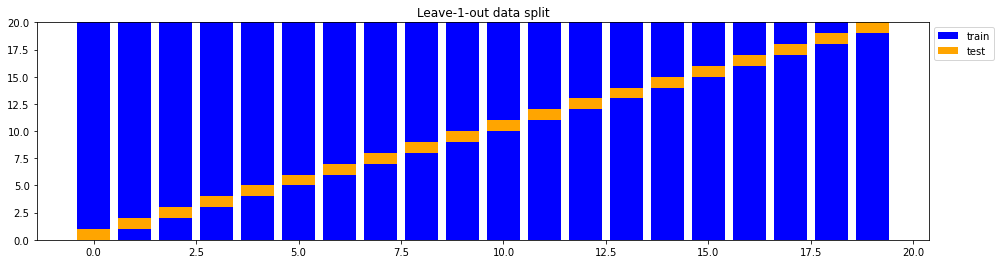

In [5]:
plt.figure(figsize=(16, 4))

i = 0
for train_idx, test_idx in leave_1_out(X, y):
    plot_data_split(y, test_idx, i)
    i +=1

plt.title(f"Leave-{1}-out data split")
plt.legend(bbox_to_anchor=(1, 1, 0, 0))
plt.show()

# Using sklearn, we can try the same, and also higher values for p

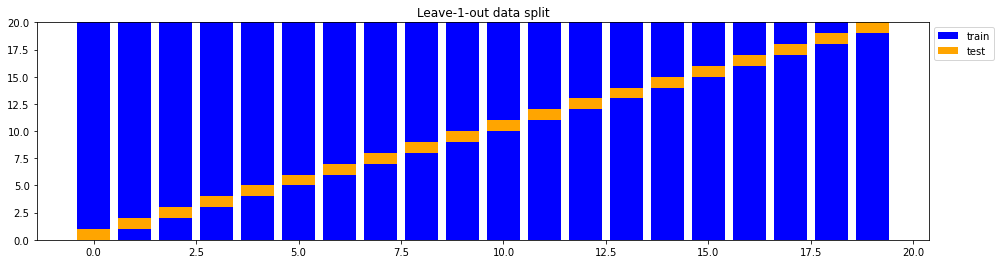

In [6]:
L1O = model_selection.LeavePOut(1)

plt.figure(figsize=(16, 4))

i = 0
for train_idx, test_idx in L1O.split(X, y):
    plot_data_split(y, test_idx, i)
    i +=1

plt.title(f"Leave-{1}-out data split")
plt.legend(bbox_to_anchor=(1, 1, 0, 0))
plt.show()

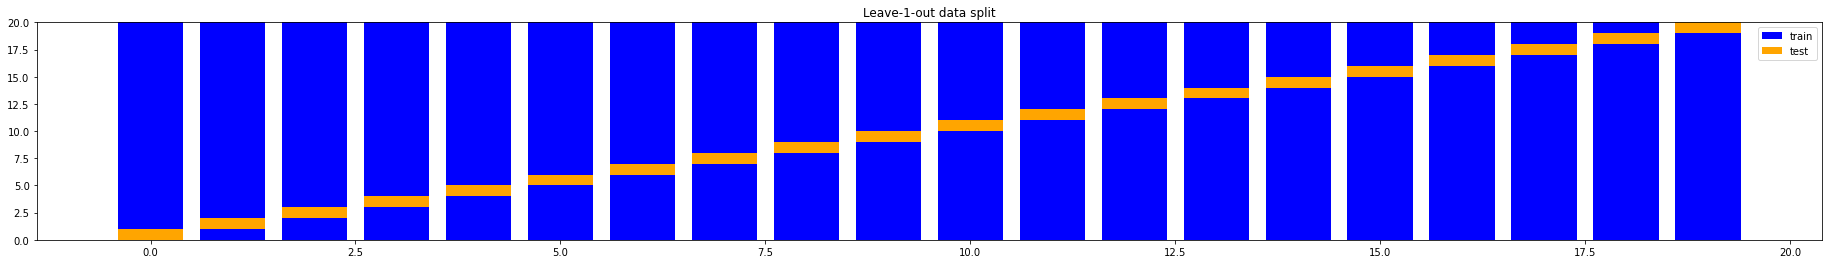

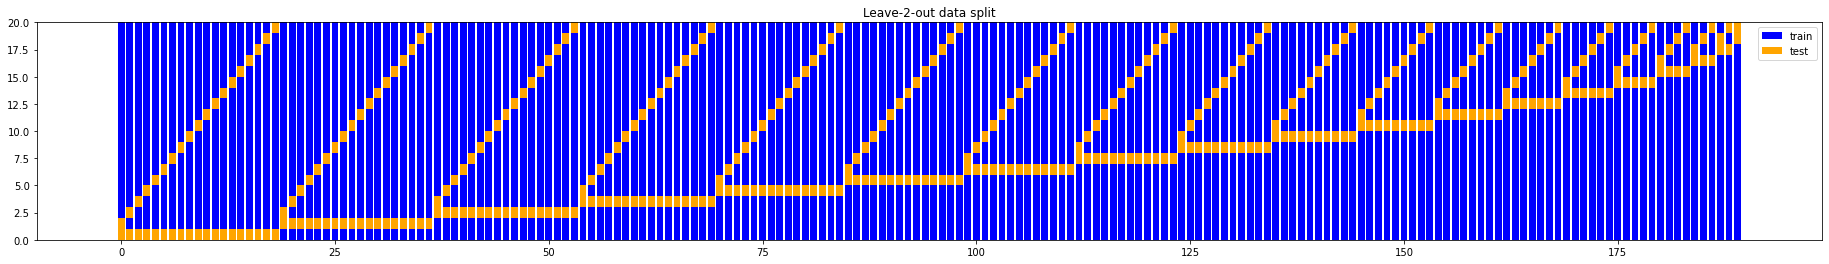

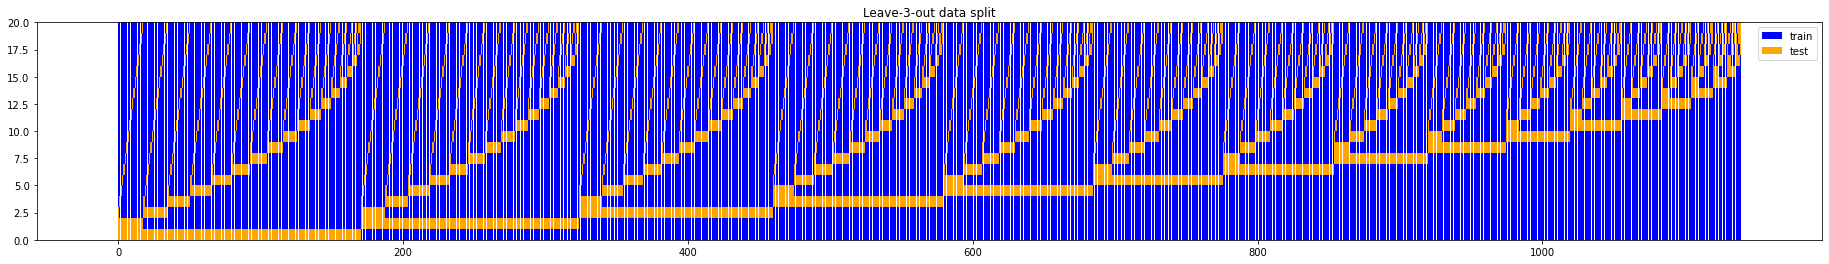

In [7]:
for p in range(1, 4):
    LpO = model_selection.LeavePOut(p)

    plt.figure(figsize=(32, 4))

    i = 0
    for train_idx, test_idx in LpO.split(X, y):
        plot_data_split(y, test_idx, i)
        i +=1

    plt.title(f"Leave-{p}-out data split")
    plt.legend(bbox_to_anchor=(1, 1, 0, 0))
    plt.show()